In [1]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv(r"../../data/processed/cridex_static.csv")

df.drop("Is Encrypted Traffic", axis=1, inplace=True)

## EDA

In [3]:
info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(40945, 31)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Source Port,int64,0,0.0
Destination Port,int64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,int64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Categorical

In [4]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,3,TCP,60.00%
1,Flags,6,"PSH,ACK",40.00%
2,Label,2,Benign,80.00%
3,direction,2,outbound,60.00%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,24567,60.000000
1,MEDIA,8189,20.000000
2,DATA-TEXT-LINES,8189,20.000000


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,"PSH,ACK",16378,40.000000
1,SYN,8189,20.000000
2,"FIN,SYN,PSH,ACK",8188,19.997558
3,"FIN,SYN,ACK",8188,19.997558
4,"FIN,SYN,RST,PSH,ACK",1,0.002442
5,"FIN,SYN,RST,ACK",1,0.002442


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,32756,80.000000
1,Cridex,8189,20.000000


---

### Column: direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,24567,60.000000
1,inbound,16378,40.000000


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Mean,5.080451e+05,3.763920e+04,2.778600e+04,10.989547,1.985344e+03,420.643307,33.479647,396.575992,483.826646,1.457188,...,0.003953,0.0,2.400049,0.600000,0.800000,0.400000,0.0,0.600000,0.0,0.0
Median,5.721620e+05,5.188600e+04,8.080000e+03,12.000000,1.824000e+03,94.750000,1.885618,42.000000,352.000000,0.672703,...,0.003356,0.0,2.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0
Mode,3.814015e+05,8.080000e+03,8.080000e+03,4.000000,5.360000e+02,44.666667,0.000000,34.000000,46.000000,0.000000,...,0.000936,0.0,2.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0
Std Dev,9.146851e+04,2.441156e+04,2.431965e+04,6.763451,1.604297e+03,498.632444,46.230284,487.664843,496.698345,1.530242,...,0.003145,0.0,1.019893,0.489904,0.400005,0.489904,0.0,0.489904,0.0,0.0
Variance,8.366489e+09,5.959240e+08,5.914454e+08,45.744273,2.573769e+06,248634.314650,2137.239168,237816.999458,246709.245690,2.341640,...,0.000010,0.0,1.040182,0.240006,0.160004,0.240006,0.0,0.240006,0.0,0.0
Range,3.826858e+05,5.745400e+04,5.745300e+04,20.000000,5.323000e+03,1388.238095,599.402110,1383.000000,1416.000000,3.328932,...,0.013786,0.0,4.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0
Min,1.902569e+05,8.080000e+03,8.080000e+03,2.000000,3.480000e+02,34.761905,0.000000,34.000000,38.000000,0.000000,...,0.000936,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
Max,5.729427e+05,6.553400e+04,6.553300e+04,22.000000,5.671000e+03,1423.000000,599.402110,1417.000000,1454.000000,3.328932,...,0.014722,0.0,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0


### Correlation Matrix:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Bytes per Second,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Duration,1.000000,-0.089762,-0.067029,0.214259,0.161446,-0.003425,0.012734,-0.005397,0.000013,-0.003385,...,-0.079746,NaN,0.000479,0.003949,-0.003651,0.000968,NaN,0.003948,NaN,NaN
Source Port,-0.089762,1.000000,-0.981181,-0.019089,-0.389516,-0.416507,0.150958,-0.418587,-0.368083,-0.105303,...,-0.380229,NaN,-0.079175,0.164786,-0.403642,-0.164786,NaN,0.988683,NaN,NaN
Destination Port,-0.067029,-0.981181,1.000000,-0.014240,0.365431,0.418066,-0.153370,0.420471,0.368974,0.105680,...,0.393155,NaN,0.079458,-0.165402,0.405151,0.165402,NaN,-0.992412,NaN,NaN
Packets,0.214259,-0.019089,-0.014240,1.000000,-0.609385,-0.782036,0.328457,-0.802230,-0.700250,-0.841450,...,-0.655297,NaN,0.637090,0.884755,-0.000737,0.884154,NaN,0.000831,NaN,NaN
Bytes,0.161446,-0.389516,0.365431,-0.609385,1.000000,0.944541,0.281435,0.929182,0.975341,0.820480,...,0.952090,NaN,-0.043036,-0.786516,0.465640,-0.406322,NaN,-0.382441,NaN,NaN
Mean Payload Size,-0.003425,-0.416507,0.418066,-0.782036,0.944541,1.000000,0.034842,0.998177,0.980551,0.886653,...,0.961062,NaN,-0.260245,-0.890536,0.377012,-0.582707,NaN,-0.421267,NaN,NaN
Std Payload Size,0.012734,0.150958,-0.153370,0.328457,0.281435,0.034842,1.000000,-0.020908,0.227307,-0.021362,...,0.279025,NaN,0.698447,0.168563,0.341707,0.447565,NaN,0.152768,NaN,NaN
Min Payload Size,-0.005397,-0.418587,0.420471,-0.802230,0.929182,0.998177,-0.020908,1.000000,0.968671,0.892886,...,0.946583,NaN,-0.294857,-0.903905,0.363549,-0.607068,NaN,-0.423375,NaN,NaN
Max Payload Size,0.000013,-0.368083,0.368974,-0.700250,0.975341,0.980551,0.227307,0.968671,1.000000,0.866032,...,0.990653,NaN,-0.112738,-0.839982,0.440742,-0.480118,NaN,-0.372190,NaN,NaN
Mean Entropy,-0.003385,-0.105303,0.105680,-0.841450,0.820480,0.886653,-0.021362,0.892886,0.866032,1.000000,...,0.834763,NaN,-0.201347,-0.987060,0.476136,-0.598297,NaN,-0.106486,NaN,NaN


### Correlation Matrix Heatmap:

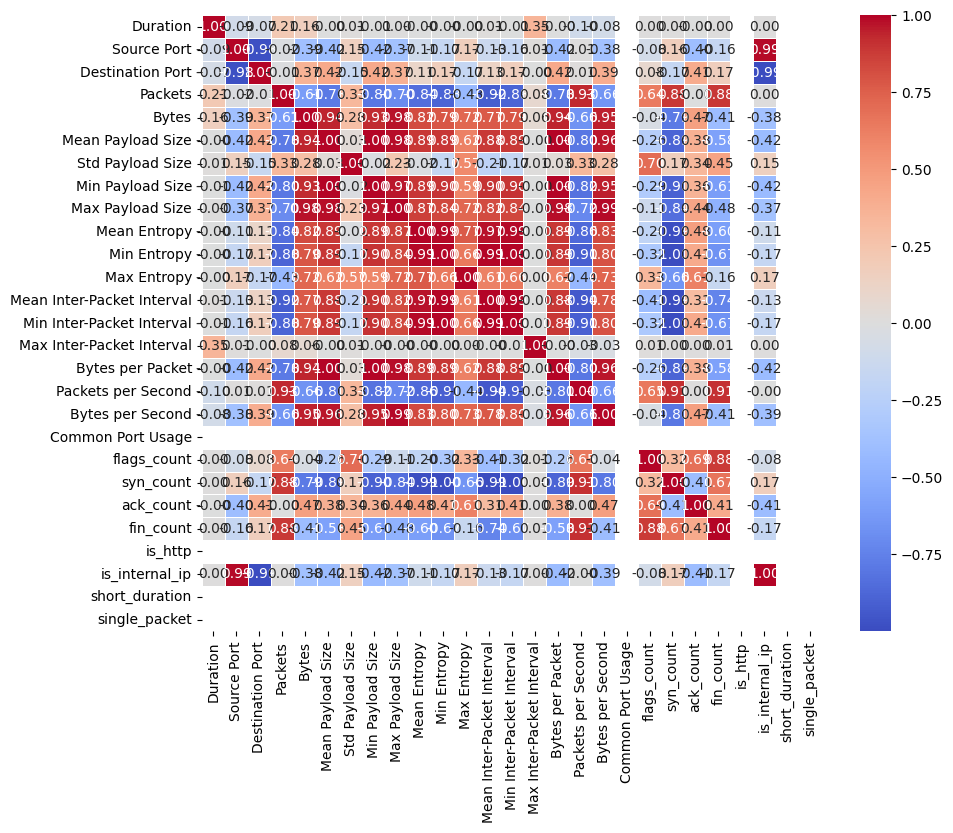

In [5]:
info.numerical_summary()

## Modeling

### Final Data Prep

In [6]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [10]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label", "direction"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    path = "../../variables/cridex/static_no_pca" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [11]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["flags_count"] = df["flags_count"].astype("float64")

In [47]:
# df.drop(["Protocol","Packets","Bytes","Duration", "bytes_per_packet","fin_count", "packet_length", "short_duration","Source Port"], axis=1,inplace=True)

### Data Splitting

In [12]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

# Initialize and apply MinMaxScaler to the dropped_df
scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
print(dropped_df.columns)
# Create a DataFrame from the scaled dropped_df
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

# Reattach the 'Status' column
df["Label"] = label_column

save_as_pickle(r"../../variables/cridex/static_no_pca/scaler.pkl", scaler)

Index(['Duration', 'Source Port', 'Destination Port', 'Protocol', 'Flags',
       'Packets', 'Bytes', 'Mean Payload Size', 'Std Payload Size',
       'Min Payload Size', 'Max Payload Size', 'Mean Entropy', 'Min Entropy',
       'Max Entropy', 'Mean Inter-Packet Interval',
       'Min Inter-Packet Interval', 'Max Inter-Packet Interval',
       'Bytes per Packet', 'Packets per Second', 'Bytes per Second',
       'Common Port Usage', 'flags_count', 'syn_count', 'ack_count',
       'fin_count', 'is_http', 'is_internal_ip', 'direction', 'short_duration',
       'single_packet'],
      dtype='object')


## Models

### Model Creation and Parameters

In [13]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_neighbors = 5
knn_train_model = KNeighborsClassifier(n_neighbors=n_neighbors)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

### Splitting

In [14]:
# Reset the index to convert it to a normal column (if needed)
df_reset = df.reset_index(drop=True)  # This will drop the old index column
X = df_reset.drop("Label", axis=1)  # Now drop the Label
if 'index' in X.columns:
    X.drop('index', axis=1, inplace=True)
y = df["Label"]

### KNN

In [45]:
knn_normal = prisma.MachineLearning()
knn_normal_metrics, avg_knn_normal_metrics, knn_normal_model = (
    knn_normal.evaluate_model(X, y, test_size, iterations, knn_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it]


### Random Forest

In [46]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model:   3%|▎         | 1/30 [00:16<08:08, 16.85s/it]


KeyboardInterrupt: 

### Logistic Regression

In [15]:
logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model: 100%|██████████| 30/30 [00:04<00:00,  6.63it/s]


### Model Evaluation

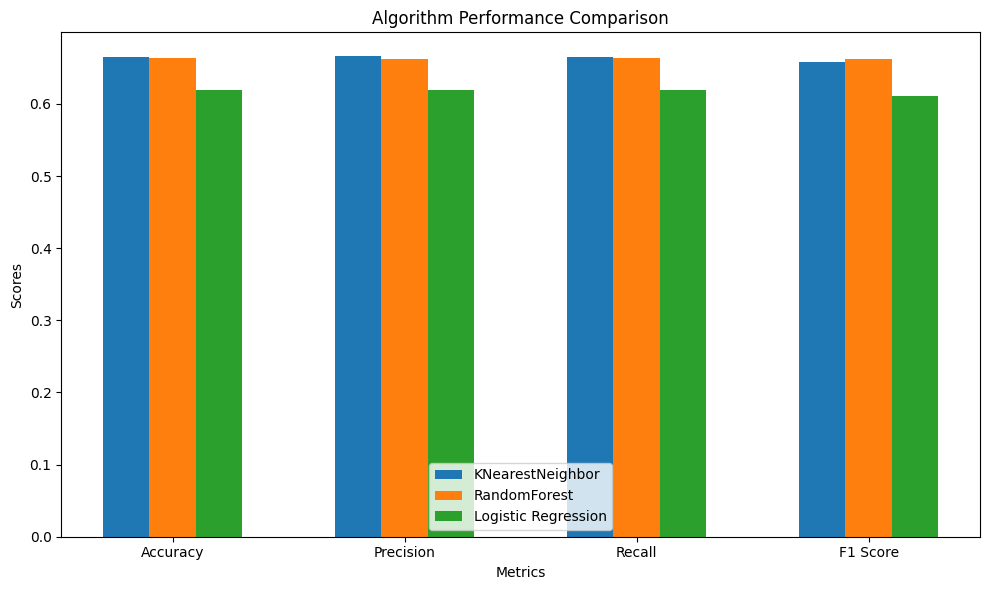

In [20]:
normal_metrics = {"KNearestNeighbor":avg_knn_normal_metrics, "RandomForest":avg_rf_normal_metrics, "Logistic Regression":avg_logreg_normal_metrics}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [21]:
normal_metrics

{'KNearestNeighbor': {'Accuracy': 0.665,
  'Precision': 0.666,
  'Recall': 0.665,
  'F1 Score': 0.658},
 'RandomForest': {'Accuracy': 0.664,
  'Precision': 0.663,
  'Recall': 0.664,
  'F1 Score': 0.663},
 'Logistic Regression': {'Accuracy': 0.62,
  'Precision': 0.619,
  'Recall': 0.62,
  'F1 Score': 0.611}}

In [28]:
save_as_pickle(r"../../models/Rbot_KNN.pkl", knn_normal_model)

In [16]:
avg_logreg_normal_metrics


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

In [17]:
logreg_normal_metrics

,Accuracy,Precision,Recall,F1 Score
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0


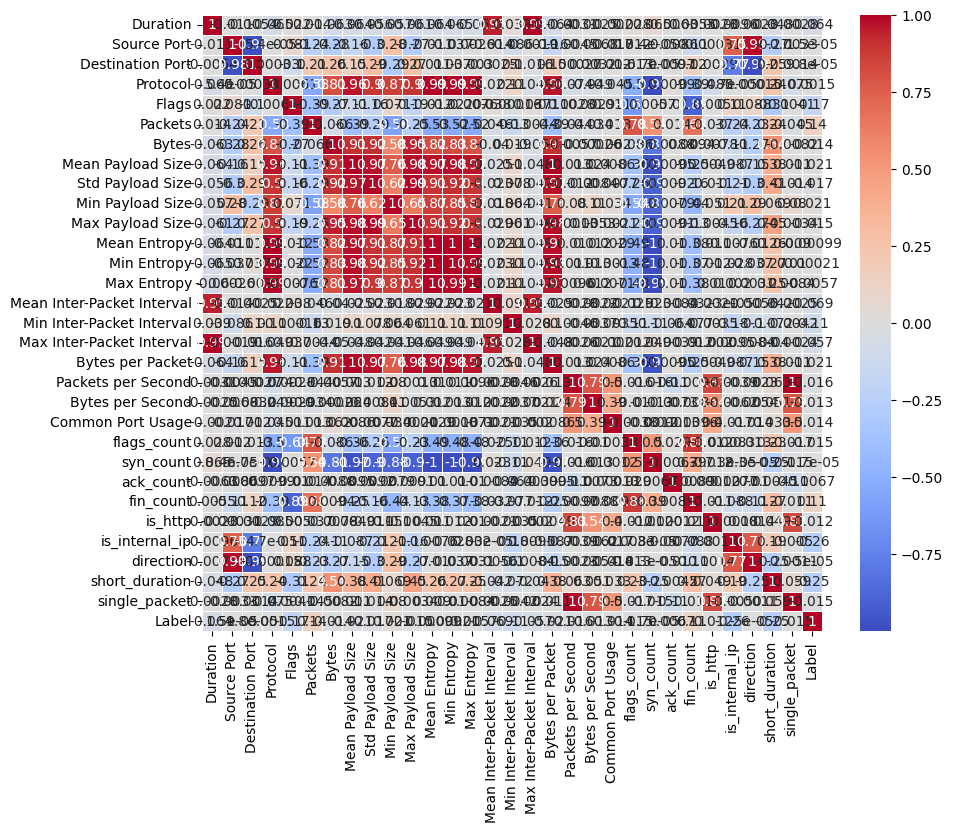

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the heatmap
plt.show()

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

# Define the XGBoost classifier with default settings
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1.2,
    max_depth=3,
    alpha=0.09,  # L1 regularization
    reg_lambda=0.09,        # L2 regularization (formerly lambda_)
    n_estimators=100,  # Control the number of trees
    learning_rate=0.125,  # Decreased learning rate
    subsample=0.8,  # Use 80% of data for training each tree
    colsample_bytree=0.8,  # Use 80% of features for training each tree
    random_state=23  # For reproducibility
)
#! 0.1, 0.11,
# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  1.0
Confusion Matrix:
 [[9827    0]
 [   0 2457]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9827
           1       1.00      1.00      1.00      2457

    accuracy                           1.00     12284
   macro avg       1.00      1.00      1.00     12284
weighted avg       1.00      1.00      1.00     12284



In [19]:
# Check the performance on the training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already have test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [20]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5)

# Print the average accuracy across the folds
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy: 1.0


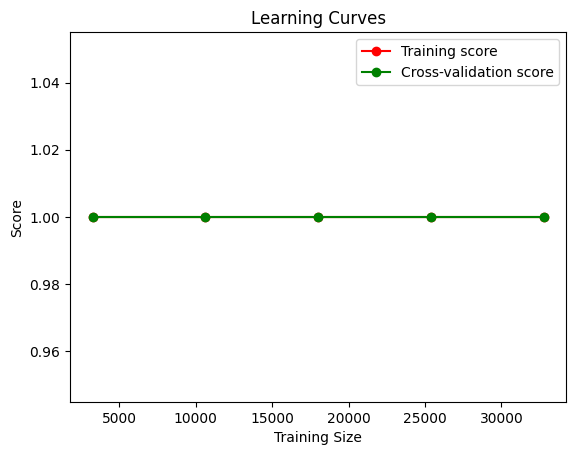

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()


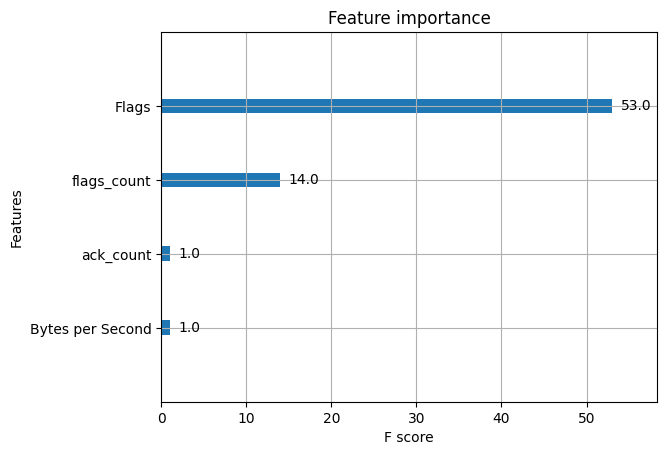

In [23]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [47]:
save_as_pickle(r"../../models/dridex/xgb.pkl", xgb_model)

In [21]:
save_as_pickle(r"../../models/emotet/logreg.pkl", logreg_normal_model)